In [0]:
from datetime import datetime, timedelta

import matplotlib.finance as matfin
import matplotlib.pyplot as plt
import pandas.io.data as web
import statsmodels.api as sm
import datetime as dt
import pandas as pd
import numpy as np
import pymysql

%matplotlib inline

C:\Users\leekeonhoon\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [0]:
conn = pymysql.connect(host='', port=3306, user='', passwd='', db='')

cur = conn.cursor()
df = pd.DataFrame()

CODE : 004910.KS
DATE : 2016-07-18
DATE : 2016-08-18


C:\Users\leekeonhoon\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


          Date     Open     High      Low    Close  Adj_Close  Volatility  \
1   2016-07-19  11450.0  11450.0  11250.0  11300.0    11300.0    0.995595   
2   2016-07-20  11300.0  11450.0  11250.0  11300.0    11300.0    1.000000   
3   2016-07-21  11350.0  11350.0  11050.0  11050.0    11050.0    0.977876   
4   2016-07-22  11000.0  11150.0  10950.0  11050.0    11050.0    1.000000   
5   2016-07-25  11000.0  11150.0  11000.0  11050.0    11050.0    1.000000   
6   2016-07-26  11100.0  11200.0  11050.0  11150.0    11150.0    1.009050   
7   2016-07-27  11100.0  11400.0  11100.0  11350.0    11350.0    1.017937   
8   2016-07-28  11350.0  11450.0  11150.0  11200.0    11200.0    0.986784   
9   2016-07-29  11300.0  11350.0  11150.0  11150.0    11150.0    0.995536   
10  2016-08-01  11200.0  11250.0  11100.0  11150.0    11150.0    1.000000   
11  2016-08-02  11150.0  11250.0  11000.0  11200.0    11200.0    1.004484   
12  2016-08-03  11150.0  11200.0  11000.0  11200.0    11200.0    1.000000   

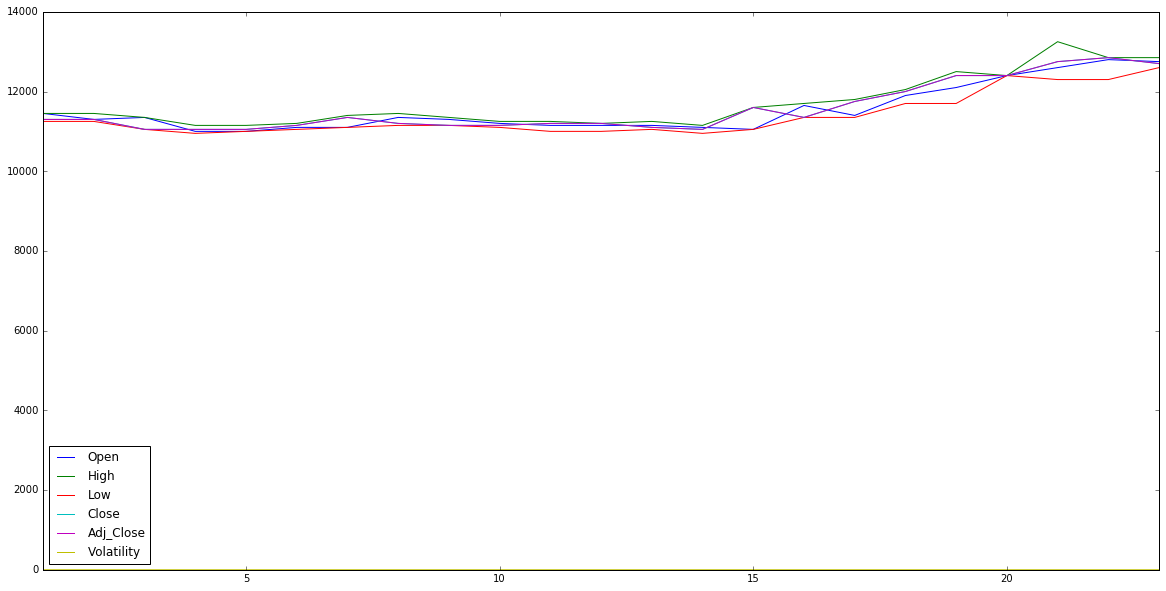

In [0]:
class Boxpattern:
    def __init__(self, code, start_date, end_date):
        self.code = code #조광페인트 004910.KS
        self.beg_date = beg_date
        self.end_date = end_date
        
    def DB_connect(self):
        conn = pymysql.connect(host='', port=3306, user='', passwd='', db='')
        return conn
    
    def get_data(self):
        code = self.code
        beg_date = self.beg_date
        end_date = self.end_date
               
        cur.execute("SELECT date, open, high, low, close ,adj_close from boxpattern where date >= '%s' and date <= '%s' order by date ASC" 
                    % (beg_date, end_date))
        rows = cur.fetchall()
        
        data = pd.DataFrame(np.array(rows))
        data.columns = ['Date','Open','High','Low','Close','Adj_Close']
        
        return data
   
    #박스권 상향 돌파
    def box_up_break(self):
        data = self.get_data().convert_objects(convert_numeric = True)
        code = self.code
                
        data['Volatility'] = data['Adj_Close'] / data['Adj_Close'].shift(1) #변동성
        data = data[1:] #data 1부터 출력   
        
        data['Status'] = np.where(data['Volatility'] >= 1,'매수','불투') #변동성이 1이상일 때 매수, 아니면 불투
                
        return data
    
    #캔들차트    
    def box_up_break_candlechart(self):
        data2 = self.get_box_up_break().convert_objects(convert_numeric = True)
        code = self.code
        
        fig = plt.figure(figsize = (20, 10))
        ax = fig.add_subplot(111)

        matfin.candlestick2_ohlc(ax, data.index, data['Open'], data['High'], data['Low'], data['Adj_Close'], 
                                 width = 0.5, colorup = 'r', colordown = 'b')
        plt.show()
        
        return data
    
code = input('CODE : ')
beg_date = str(input('DATE : '))
end_date = str(input('DATE : '))

b = Boxpattern(code, beg_date, end_date)
print(b.box_up_break())
b.box_up_break().plot(figsize = (20, 10))